In [49]:
import os
import numpy as np
import glob
import librosa
import soundfile as sf

# vox2 train soxaug

In [45]:
out_path = os.path.join('/workspace/DATASET/server9_ssd/voxceleb', 'vox2_trainlist_soxaugpart.txt')

In [50]:
out_wav_top = os.path.join('/workspace/DATASET/server9_ssd/vox2_soxaug')

In [47]:
ori_wav_dirs = glob.glob('/workspace/DATASET/server9_ssd/voxceleb/vox2/dev/aac/**/*.wav', recursive = True)

In [22]:
ori_wav_dirs[0]

'/workspace/DATASET/server9_ssd/voxceleb/vox2/dev/aac/id08954/j_ulgJU3Jmk/00030.wav'

In [48]:
len(ori_wav_dirs)

1092009

In [ ]:
spk_utt_dict = {}
for count, line in enumerate(ori_wav_dirs):
    data = line.split('/')
    label = data[8]+'_slow'
    
    wav, _ = librosa.load(line, sr=17600)
    if not os.path.exists(os.path.join(out_wav_top, label, data[-2])):
        os.makedirs(os.path.join(out_wav_top, label, data[-2]))
    
    sf.write(os.path.join(out_wav_top, label, data[-2], data[-1]), wav, 16000, subtype='PCM_24')    
    
    path = os.path.join('vox2_soxaug', label, data[-2], data[-1])

    if label not in spk_utt_dict.keys():
        spk_utt_dict[label] = [path]
    else:
        spk_utt_dict[label].append(path)
    if ((count+1) % 10000) == 0:
        print((count+1) // 10000)

print('slow', count+1)

for count, line in enumerate(ori_wav_dirs):
    data = line.split('/')
    label = data[8]+'_fast'
    
    wav, _ = librosa.load(line, sr=14400)
    if not os.path.exists(os.path.join(out_wav_top, label, data[-2])):
        os.makedirs(os.path.join(out_wav_top, label, data[-2]))
    
    sf.write(os.path.join(out_wav_top, label, data[-2], data[-1]), wav, 16000, subtype='PCM_24')    
    
    path = os.path.join('vox2_soxaug', label, data[-2], data[-1])

    if label not in spk_utt_dict.keys():
        spk_utt_dict[label] = [path]
    else:
        spk_utt_dict[label].append(path)
        
    if ((count+1) % 10000) == 0:
        print((count+1) // 10000)

print('fast', count+1)

In [25]:
len(spk_utt_dict.keys())

5994

In [26]:
count = 0
for i in spk_utt_dict:
    count += len(spk_utt_dict[i])
count

1092009

In [27]:
spk_sorted = np.sort(list(spk_utt_dict.keys()))

In [28]:
out  = open(out_path, 'w')
for spk in spk_sorted:
    for path in spk_utt_dict[spk]:
        out_line = spk + ' ' + path + '\n'
        out.write(out_line)
out.flush()
out.close()

# test librosa

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
'/workspace/DATASET/server9_ssd/voxceleb/vox2/dev/aac/id00012/_raOc3-IRsw/00110.wav'

In [11]:
import librosa
import soundfile as sf

In [14]:
sf.default_subtype('WAV')

'PCM_16'

In [6]:
librosa.__version__

'0.8.0'

In [43]:
16000 * 0.9

14400.0

In [17]:
a1, sr = librosa.load('/workspace/DATASET/server9_ssd/voxceleb/vox2/dev/aac/id00012/_raOc3-IRsw/00110.wav', sr=17600)

In [41]:
a2, sr = librosa.load('/workspace/DATASET/server9_ssd/voxceleb/test.wav', sr=None)

In [42]:
a2[1000]

-0.00044846535

In [39]:
a2[1000]

-0.00045776367

In [33]:
a1[1000]

-0.00044835542

In [34]:
a2[1000]

-0.00045776367

In [30]:
a = np.array(a1 == a2)

In [32]:
np.sum(a.astype(int))

726

In [24]:
a2[-1]

0.0

In [19]:
a1.shape

(95745,)

In [40]:
sf.write('/workspace/DATASET/server9_ssd/voxceleb/test.wav', a1, 16000, subtype='PCM_24')

In [10]:
sr

17600

In [9]:
a.shape

(95745,)

In [60]:
from scipy.io import wavfile
import scipy

In [141]:
a = wavfile.read('/workspace/DATASET/server9_ssd/voxceleb/vox2/dev/aac/id00012/_raOc3-IRsw/00110.wav')

In [142]:
a[1].shape

(87040,)

In [163]:
%%timeit -n 100
b = scipy.signal.resample_poly(a[1], 11, 10)

5.85 ms ± 436 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [151]:
b.shape

(78336,)

In [117]:
a[1].shape

(87040,)

In [ ]:
500000 * 128

In [164]:
%%timeit -n 100
b = scipy.signal.resample(a[1], 95744)

6.84 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [137]:
min(a[1])

-18392

In [135]:
min(b)

-18681.376086716784

In [121]:
a = librosa.load('/workspace/DATASET/server9_ssd/voxceleb/vox2/dev/aac/id00012/_raOc3-IRsw/00110.wav', sr=16000)

In [122]:
b = librosa.resample(a[0].astype(float), 16000, 17600)

In [125]:
b = librosa.resample(a[1].astype(float), 16000, 17600)

In [123]:
sf.write('/workspace/DATASET/server9_ssd/voxceleb/test.wav', b, 16000, subtype='PCM_16')

In [152]:
wavfile.write('/workspace/DATASET/server9_ssd/voxceleb/test.wav', 16000, b.astype(np.int16))

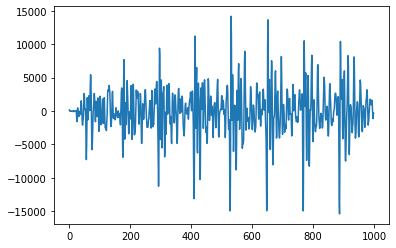

In [113]:
plt.plot(a[1][1000:2000])

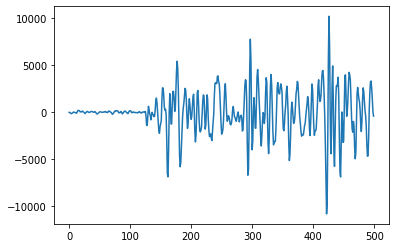

In [114]:
plt.plot(b[1000:1500])

In [165]:
a ={'a': 1, 'b': 2}

In [168]:
a.append(a)

AttributeError: 'dict' object has no attribute 'append'